# ПРОИЗВОДИТЕЛЬНОСТЬ МОДЕЛЕЙ ВРЕМЕННЫХ РЯДОВ
В литературе по машинному обучению и статистическому анализу основное внимание уделяется точности моделей. Обычно точность выступает главной целью при оценке модели, но иногда — в условиях больших наборов данных или широко развернутых моделей для обслуживания большого количества клиентских приложений — огромное значение также имеет производительность вычислений.
Наборы временных рядов становятся настолько большими, что анализ не может быть выполнен вообще или не выполняется должным образом, потому что модели становятся слишком требовательными к вычислительным ресурсам. В подобных случаях многими организациями рассматриваются следующие варианты решений.
• Расширить вычислительную ресурсную базу (очень затратно как с финансовой, так и с ресурсной точки зрения).
• Выполнить проект с заниженным качеством (вследствие недостаточно точных настроек гиперпараметров, слишком большого объема данных и т.д.).
• Отказаться от выполнения проекта (Да, в реальном мире это происходит постоянно).
Ни один из вариантов не является оптимальным, особенно при работе над проектом с новым набором данных или новыми аналитическими инструментами. Зачастую вы даже не будете знать, являются ли плохие результаты следствием плохих данных, чрезмерной сложности задачи или нехватки вычислительных ресурсов. К счастью, существуют некоторые обходные пути, позволяющие расширить аналитические возможности в случае слишком высоких требований к точности получаемых результатов или очень больших наборов данных.
Мы приведем некоторые соображения о способах экономии вычислительных ресурсов при обучении или тестировании конкретных моделей.
По большей части такие вопросы относятся к исследованию наборов целевых данных, изучению возможностей вычислительного оборудования, а также к анализу целей, которых нужно достичь, в первую очередь в контексте точности и производительности. Вы увидите, что проблемы, подробно описанные здесь, имеют самое непосредственное отношение к практическим задачам. Если приведенный далее материал хотя бы частично поможет вам в решении возникающих трудностей, хочется верить, что это вдохновит вас на дальнейшие свершения.
Изложенные соображения становятся актуальными только после завершения первых этапов анализа и моделирования — не стоит уделять им слишком много внимания при первом же обнаружении проблем. Однако по мере выпуска модели в производственную среду или в случае расширения исследовательского проекта вам придется обращать на них самое пристальное внимание.


## Общие инструменты
Одна из проблем анализа данных временных рядов состоит в том, что большинство инструментов, особенно применяемых в машинном обучении, исходно рассчитывались на общие сценарии использования, а большинство наглядных примеров приведено для перекрестных данных. Существует несколько причин, по которым такие методы машинного обучения не могут показать хорошую (максимально возможную) производительность при работе с временными рядами. У каждой из задач есть свое решение несмотря на совпадение общих идей. В этом разделе как раз и пойдет речь об общих проблемах и их возможных решениях.


## Модели для перекрестных данных не обрабатывают общие данные разных выборок
Во многих случаях при передаче большого количества выборок данных временных рядов в алгоритм машинного обучения можно заметить, что некоторые из них включают перекрывающиеся значения. Предположим, что вам предстоит обработать следующие данные о ежемесячных объемах продаж.

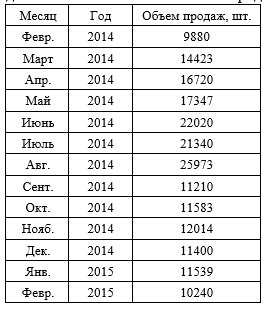

Вы стремитесь делать прогнозы, сопоставляя каждую форму с ближайшей соседней кривой. При этом для исходных данных подготавливается много форм.
Ниже перечислены лишь некоторые точки данных, поскольку в качестве представляющих интерес форм можно использовать только кривые длиной шесть месяцев (обратите внимание, что предварительная обработка данных для нормализации или создания дополнительных признаков, представляющих интерес  скользящее среднее или сглаженные кривые,   не выполнялась) (При использовании моделей машинного и глубокого обучения, обсуждавшихся ранее, обычно извлекается много выборок временных рядов из одного большого временного ряда.).
11221, 9880, 14423, 16720, 17347, 22020
9880, 14423, 16720, 17347, 22020, 21340
14423, 16720, 17347, 22020, 21340, 2597
К сожалению, все, чего удалось добиться в ходе подготовки входных данных,   это сделать наш набор в шесть раз больше, не получив никакой дополнительной информации. С точки зрения производительности такое преобразование данных считается катастрофическим, но оно часто происходит при передаче данных в различные модули машинного обучения.
Столкнувшись с такой проблемой, рассмотрите несколько решений.


## Отказ от использования перекрывающихся данных
Создайте “выделенные” точки данных так, чтобы каждый отдельный месяц относился только к одной кривой. Если сделать так для предыдущих данных, то можно получить следующий результат.
11221, 9880, 14423, 16720, 17347, 22020
21340, 25973, 11210, 11583, 12014, 11400
Заметьте, это очень простое решение, поскольку сводится к изменению формы массива, а не к повторению данных.
## Использование генераторной парадигмы для перебора набора данных
Генераторная парадигма перебора набора данных, т.е. повторная выборка из одной и той же структуры данных, особенно легко реализуется на языке Python и может быть выполнена на языке R, а также на некоторых других языках. Если представить, что исходные данные хранятся в одномерном массиве NumPy, то реализация такой парадигмы может выглядеть, как в следующем коде (обратите внимание, что должна использоваться структура данных машинного обучения или алгоритм, поддерживающий работу с генераторами).


In [1]:
def array_to_ts (arr) :
    idx = 0
    while idx + 6 <= arr.shape[0]:
        yield arr[idx:(idx+6)]


Заметьте, что код моделирования данных не должен вызывать переструктурирования набора данных — это крайне важное требование как для этапа обучения, так и производственного использования. При обучении это позволит разместить больше примеров обучения в памяти, а на производственном уровне — построить больше прогнозов (или классификаций) на меньшим количестве обучающих ресурсов для перекрывающихся данных. Если вам приходится часто составлять прогнозы для одного и того же сценария использования, то, вероятнее всего, вы работаете с перекрывающимися данными, а рассмотренные выше проблема и способы ее решения окажутся как нельзя кстати.

Задержка между измерением данных и прогнозом в моделях без предварительной обработки
Обычно модели машинного обучения не предусматривают предварительной подготовки данных и не проводят предварительные расчеты для их части до получения всех данных. Однако в случае временных рядов это очень распространенный сценарий.
Используя модель в чувствительном к временным задержкам приложении, например в программном обеспечении постановки медицинских диагнозов, оценки местоположения транспортных средств или прогнозирования цены на акции, вы можете обнаружить, что задержка вычисления прогноза до момента, когда станут доступны все данные, слишком велика. В таком случае постарайтесь понять, можно ли заранее выполнить часть вычислений, предусмотренных моделью. Вот несколько примеров того, как это можно сделать.
• Используя рекуррентную нейронную сеть с несколькими каналами информации в течение ста различных временных шагов, можно предварительно вычислить/развернуть нейронную сеть для первых 99 временных шагов. Затем, когда, наконец, появится последняя точка данных, нужно будет сделать только последний подход к вычислению произведения матриц (и операций, заданных в функции активации), а не сто. Теоретически это может уменьшить время отклика в сто раз.
• Работая с моделью AR(5), вы можете предварительно вычислить сумму, за исключением последнего члена. Напомним, что процесс AR(5) описывается следующим образом: если вы собираетесь сделать прогноз, то понадобятся известные значения  а это означает, что, зная  , можно заранее рассчитать все, кроме члена  .

• Если вы используете модель кластеризации для нахождения ближайших соседей по методу суммирования признаков временного ряда (среднего значения, стандартного отклонения, максимума, минимума и т.д.), то можете вычислить эти функции с помощью временного ряда с одной точкой данных и запустить модель с этим временным рядом, чтобы определить несколько ближайших соседей. Как только появится окончательное значение, нужно будет обновить признаки и перезапустить анализ, используя только ближайших соседей, найденных в первом раунде анализа. В конечном счете такой подход требует несколько больше вычислительных ресурсов, но приводит к существенному уменьшению задержки между проведением окончательных измерений и получением прогноза.
Во многих случаях задержка модели может быть больше, чем время отклика сети или другие временные факторы, поэтому к предварительному вычислению стоит прибегать только в случаях, когда время обратной связи чрезвычайно важно и вы уверены, что вычисление модели существенно влияет на время между получением приложением всей необходимой информации и выводом конечного прогноза.


## Форматы хранения данных: преимущества и недостатки
Одним из самых недооцениваемых критериев, определяющих производительность модели временных рядов в случае как обучения, так и производственного использования, выступает способ хранения данных. Укажем только наиболее распространенные ошибки.
• Хранение данных в формате с построчным вводом, даже если временные ряды формируются путем обхода столбцов. Приводит к тому, что точки данных, смежные во времени, оказываются несмежными в памяти.
• Хранение данных и непосредственный анализ необработанных данных. Крайне важно передавать в модель предварительно обработанные данные и данные с уменьшенной выборкой.
Обсудим детально факторы хранения данных, позволяющие ускорить обучение и вычисление модели.
## Хранение данных в двоичном формате
Очень заманчиво хранить данные в текстовом файле, разделенном запятыми, например, формата CSV. Стоит заметить, что данные предоставляются в таком формате очень часто, что делает его выбор вполне естественным решением.
Такой формат файлов оказывается удобным для визуального анализа и позволяет проверять данные при конвейерном выводе. Наконец, такие данные легко транслируются на разные платформы (Впрочем, не стоит забывать о проблеме кодировки Unicode, по-разному интерпретируемой платформами и устройствами. Нельзя наверняка утверждать, что данные становятся понятными только потому, что сохранены в текстовых файлах).
Однако компьютеру читать текстовые файлы не так легко, как кажется. Работая с наборами данных, которые настолько велики, что не помещаются в памяти во время обучения, вы будете испытывать дополнительные трудности с вводом-выводом и связанной с ними обработкой данных, зависящей от формата файла. Храня данные в двоичном формате, вы можете существенно сократить задержку, связанную с выполнением операций ввода-вывода, несколькими способами.
• Если данные представлены в двоичном формате, то пакет обработки данных гарантированно их понимает. Нет необходимости специальным образом считывать файлы формата CSV и преобразовывать их в фреймы данных. При вводе данных фрейм данных создается автоматически.
• Если данные представлены в двоичном виде, они могут быть сжаты гораздо сильнее, чем в CSV или другом текстовом формате. Это означает, что операции ввода-вывода выполняются быстрее, поскольку файл требует меньше физической памяти для размещения его содержимого.
Двоичные (бинарные) форматы хранения данных хорошо поддерживаются как языком R, так и языком Python. В языке R обратите внимание на функции save () и load () для data. table. В языке Python используйте модуль picle и заметьте, что библиотеки Pandas (pd. DataFrame . load () и pd. DataFrame.save ()) и NumPy (np. load () и np. save ()) выступают оберточными пакетами для инструментов преобразования объектов в бинарный вид, которые применяются к определенному набору объектов.


## Предварительная обработка данных для облегчения прохода по ним
Рассмотренная далее рекомендация, в первую очередь, относится к разделу “Модели для перекрестных данных не обрабатывают общие данные разных выборок”. В этом случае также задумайтесь о предварительной обработке данных и убедитесь, что вы делаете это правильно с использованием скользящего окна для создания нескольких тестовых выборок.
В качестве примера рассмотрим задачу нормализации или вычисления скользящего среднего как операцию по предварительной обработке данных. Если вы будете выполнять ее для каждого временного окна, то это приведет к повышению точности модели (хотя, согласно моему опыту, выигрыш оказывается незначительным). Однако у такого подхода есть ряд недостатков.
• Требует больше вычислительных ресурсов для многократного предварительного вычисления признаков на перекрывающихся данных только для того, чтобы получить очень схожие числа.
• Нужно хранить многочисленные снимки перекрывающихся данных, незначительно различающихся методом предварительной обработки.
• Невозможно оптимально использовать скользящее окно.
## Изменение метода анализа для повышения производительности
Многие из нас слишком привыкли к определенному набору аналитических инструментов, а также к сопутствующему набору программного обеспечения и практическим правилам обучения моделей. Мы также склонны оценивать потребности только один раз и не пересматривать их, выясняя вычислительную стоимость возможных вариантов модели.
Данные временных рядов, часто используемые для быстрого прогноза, порождают особенно острую потребность в моделях, которые можно быстро адаптировать и передать в производство. Модели должны быть хорошо адаптируемыми, чтобы их можно было обновлять по мере поступления новых данных, и они должны работать быстро, чтобы у заказчиков прогнозов для таких моделей оставалось как можно больше времени для совершения действий, продиктованных итогами прогнозирования. По этой же причине иногда может потребоваться изменить свои ожидания (пересмотрев результаты сопутствующего анализа), чтобы ускорить вычислительные процессы в задачах анализа и прогнозирования.


## Использовать все данные необязательно
Один из важнейших принципов упрощения методик анализа данных основан на понимании того, что не все значения во временном ряду одинаково важны. Как правило, более отдаленные данные имеют меньший вес. При этом данные в “исключительные” времена оказываются менее важными для моделей, разрабатываемых для данных рядовых времен.
Есть много способов уменьшить количество данных, используемых для обучения модели. Хотя многие из вариантов уже обсуждались ранее, вам будет полезно рассмотреть их, особенно в контексте влияния на производительность модели.
## Понижающая дискретизация
Часто бывает так, что при прогнозировании используются данные, которые реже включаются в одно и то же окно просмотра назад. Это один из способов уменьшения количества данных за счет мультипликативного коэффициента. Обратите внимание, что в зависимости от используемого аналитического подхода в вашем распоряжении находятся некоторые другие возможности, например, понижающая дискретизация, уровень которой зависит от глубины просмотра данных.
## Обучение только по последним данным
Хотя машинное обучение любит много данных, существуют модели временных рядов, в которых статистические или даже глубокие методы обучения показывают лучшие результаты, если сосредоточить их обучение на последних, а не на всех имеющихся данных. Это также помогает уменьшить объем входных данных, исключая из них малоинформативные для выбранной модели значения.
## Уменьшение окна просмотра, используемого для прогнозирования
Во многих моделях временных рядов производительность повышается, хотя и незначительно, по мере изучения данных все дальше и дальше в прошлом. Вам нужно определить баланс между точностью и производительностью. Может случиться так, что в память загружается намного больше данных, чем на самом деле необходимо для получения заданного уровня производительности.


## Сложные модели не всегда лучшие
При выборе аналитической модели всегда интересно и поучительно самостоятельно испытать последние технологические разработки. Однако остается открытым вопрос, компенсирует ли более изощренная модель дополнительные вычислительные затраты?
Почти все вычислительные достижения в области машинного обучения за последние годы связаны с повышением вычислительной мощности для решения все более и более усложняющихся задач. Конечно, во многих задачах, подобных распознаванию изображений, в которых правильного результата можно добиться почти со стопроцентной точностью, такой подход вполне оправдан.
С другой стороны, в таких задачах, как прогнозирование временных рядов, точность выполнения которых обусловливается строгими физическими или математическими ограничениями, не лишне убедиться, что выбор более сложной модели далеко не всегда означает автоматическое улучшение производительности без учета преимуществ/недостатков. Постарайтесь оценить, будет ли оправданным повышение точности за счет увеличения времени вычисления прогноза и обучения, а также привлечения дополнительных вычислительных ресурсов.
Может случиться так, что менее ресурсоемкий метод с немного меньшей точностью окажется гораздо более выгодным, чем причудливая модель, которая всего лишь незначительно лучше простой версии.
Если вы практикующий специалист по анализу данных, то такой компромисс между сложностью/точностью и увеличением времени/вычислительных ресурсов должен стать предметом для анализа, который можно рассматривать как дополнительный гиперпараметр настройки модели. Ваша задача — добиться компромиссных решений, а не предположить, что об этом позаботится инженер, снабжающий вас данными. Специалисты на верхних или нижних уровнях конвейера данных не смогут выбрать модель вместо вас, поэтому вы должны определиться с выбором, взвесив все “за” и “против” как с инженерной, так и с научной точек зрения.
## Кратко об альтернативных инструментах
Ознакомившись с предыдущими вариантами, рассмотрим возможность изменения базовой части кода, в частности отказавшись от медленных языков программирования, таких как Python и R. Есть несколько способов сделать это.
• Используйте языки C++ и Java. Даже если вы не работали с ними ранее, использование даже простых их инструментов поможет ускорить низкопроизводительные части конвейера настолько, что сделает сложные для реализации задачи быстрорешаемыми. В частности, язык C++ значительно эволюционировал в том, что касается удобства использования и возможностей стандартных библиотек по обработке данных. Синтаксис STL и C++ 17 теперь предлагает множество опций, вполне сопоставимых с имеющимися в языке Python, для работы с наборами временных рядов в различных структурах данных. Даже если вы испытываете давнюю неприязнь к C++ и Java, постарайтесь преодолеть ее и вернуться к их использованию (Для этих языков характерна крутая кривая обучения, но как только вы разберетесь в базовой инфраструктуре средств компиляции, их знание станет серьезным подспорьем в анализе временных рядов).
• В Python представлено несколько пакетов, с помощью которых код Python можно компилировать в код С или C++, повышая время его выполнения. Это особенно полезная практика для повторяющихся фрагментов кода со множеством циклов for, которые медленно рассчитываются в языке Python и показывают намного большую производительность в языках С и C++ без необходимости изощренного перепроектирования — цели можно достичь, реализуя тот же код на более быстром языке. Ускорить “медленные” фрагменты кода на языке Python помогут модули Numba и Cython.
• Аналогично в языке R подобная функциональная особенность реализуется с помощью пакета Repp.


## Дополнительные источники
• Оценка производительности моделей
Anthony Bagnall et al., “The Great Time Series Classification Bake Off: AnExperimental Evaluation of Recently Proposed Algorithms” Data Mining andKnowledge Discovery 31, no. 3 (2017): 606-60, https: //perma. cc/T76B-M635
В этой статье описано множество экспериментов по оценке производительности современных методологий классификации временных рядов, основанных на тестировании их на широком спектре общедоступных наборов данных. Вычислительная сложность наборов данных в конечном итоге варьируется чуть больше, чем реальная производительность опробованных методов. Как подчеркивают авторы, выбор модели, оптимальной для конкретного набора данных без перебора всех возможных вариантов, считается искусством и остается открытой проблемой.
С точки зрения вычислительных ресурсов урок, который следует здесь усвоить, состоит в том, что вычислительная сложность должна в значительной степени учитывать методологические решения. Если у вас нет убедительных причин использования сложного и ресурсоемкого алгоритма, остановитесь на более простом варианте.
• Построение упрощенных моделей
Yoon Kim and Alexander M. Rush, “Sequence Level Knowledge Distillation,” in Proceedings of the 2016 Conference on Empirical Methods in Natural Language Processing, ed. Jian Su, Kevin Duh, and Xavier Carreras (Austin, TX: Association for Computational Linguistics, 2016), 1317-27, https: //perma. cc/V4U6-EJNU
Статья следует общей концепции “дистилляции” в последовательном обучении применимо к задачам машинного перевода. Концепция дистилляции находит применение в широком спектре предметных областей.
Идея состоит в том, что сначала разрабатывается сложная модель, которая обучается на основе исходных данных, а затем более простая модель обучается на результатах сложной модели. Использование результатов сложной модели вместо исходных данных уменьшает количество шума и упрощает задачу обучения. Хотя такая методика не сокращает время обучения, она позволяет построить модель, которая работает быстрее и требует меньше ресурсов при запуске в производство.
